In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import zipfile
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "anweshnayak" # username from the json file
os.environ['KAGGLE_KEY'] = "7464dbbd65f4f70b002e7531b6d4e6c0" # key from the json file

In [ ]:
!kaggle datasets download -d havingfun/100-bollywood-celebrity-faces

100% 1.61G/1.62G [00:15<00:00, 125MB/s]
100% 1.62G/1.62G [00:15<00:00, 115MB/s]


In [ ]:
with zipfile.ZipFile('/content/100-bollywood-celebrity-faces.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data')

In [ ]:
import cv2
width, height= 224, 224
img = cv2.imread('/content/drive/MyDrive/Dataset/Train/Ranveer_Singh/1.jpg')
img_resized = cv2.resize(img,(width, height))

In [ ]:
img_resized.shape

(224, 224, 3)

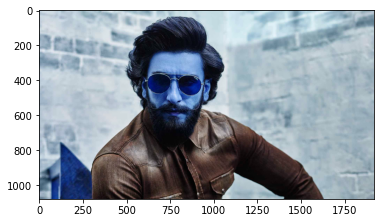

In [ ]:
plt.imshow(img)

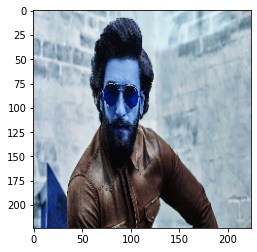

In [ ]:
plt.imshow(img_resized)

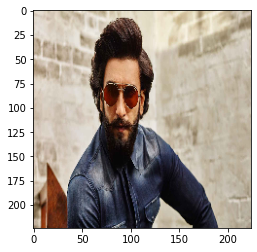

In [ ]:
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

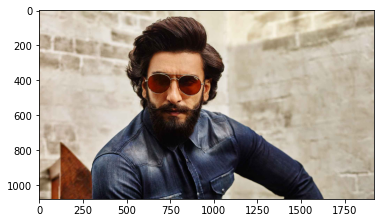

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (width, height),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 474 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                            target_size = (width, height),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 20 images belonging to 4 classes.


In [ ]:
IMAGE_SIZE = [224, 224]


# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Dataset/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders),activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
folders

['/content/drive/MyDrive/Dataset/Train/Saif_Ali_Khan',
 '/content/drive/MyDrive/Dataset/Train/Ranveer_Singh',
 '/content/drive/MyDrive/Dataset/Train/Salman_Khan',
 '/content/drive/MyDrive/Dataset/Train/Shah_Rukh_Khan']

In [ ]:
# fit the model
r = model.fit_generator( training_set,validation_data=test_set,epochs=2)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
 1/15 [=>............................] - ETA: 4:16 - loss: 1.4746 - accuracy: 0.2812

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


15/15 [==============================] - 252s 17s/step - loss: 2.2595 - accuracy: 0.2954 - val_loss: 1.4414 - val_accuracy: 0.4500
Epoch 2/2
15/15 [==============================] - 249s 17s/step - loss: 0.8633 - accuracy: 0.6688 - val_loss: 1.2085 - val_accuracy: 0.5500


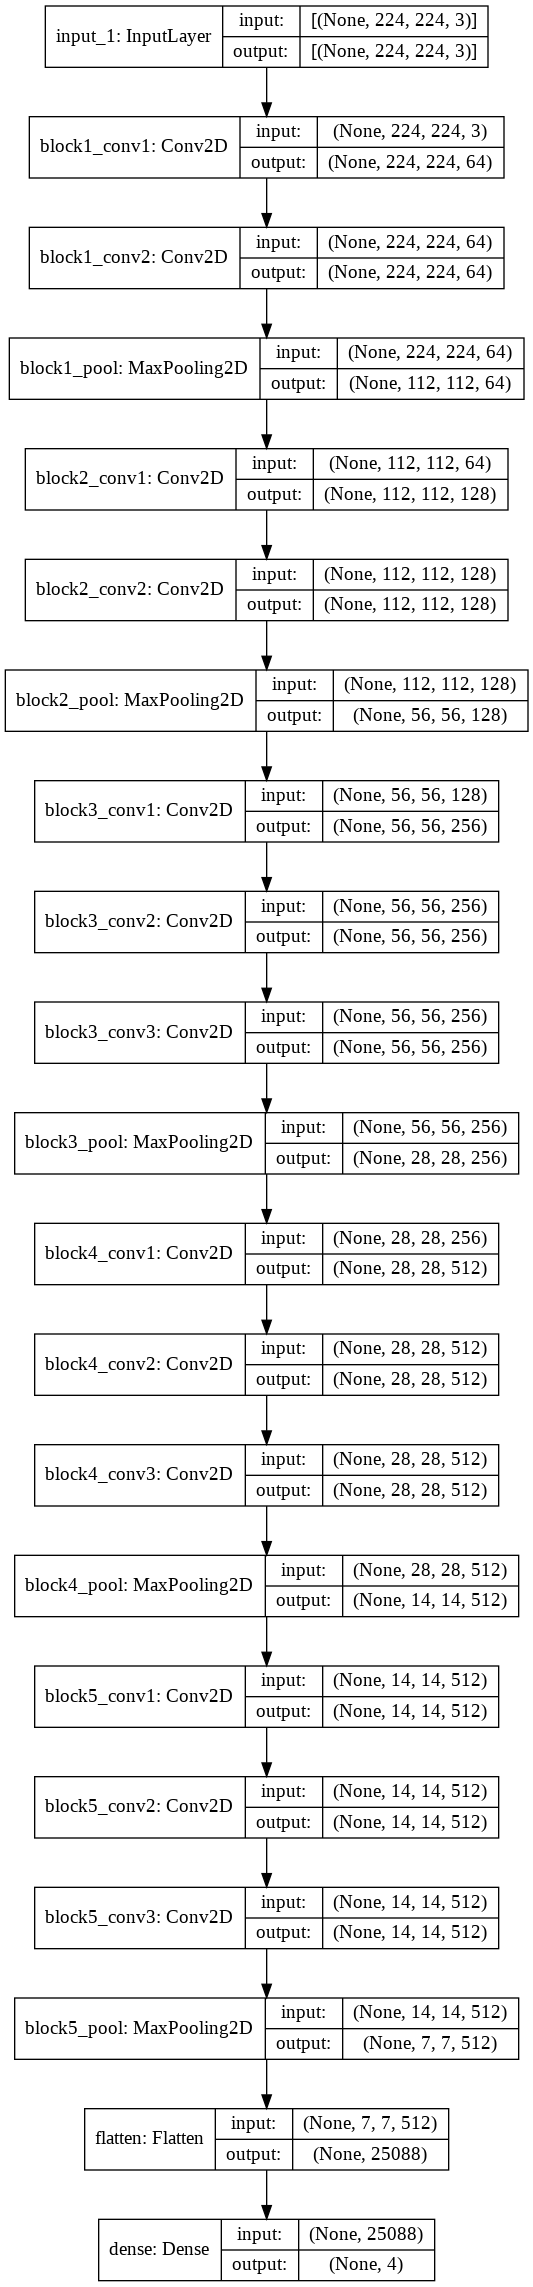

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True, show_layer_names=True)